In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline


data_train = pd.read_csv("E:train_loan.csv")
data_test = pd.read_csv("E:test_loan.csv")

In [83]:
data_train.shape #gives us rows and columns of the data set

(614, 13)

In [6]:
data_test.shape

(367, 12)

In [7]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
data_train.isnull().sum() #shows number of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
data_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
#combining of test and train data

In [16]:
def get_combined_data():
    train = pd.read_csv('E:train_loan.csv')
    test = pd.read_csv('E:test_loan.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [17]:
combined = get_combined_data()
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [84]:
#now we fill missing variables


In [45]:
def impute_gender():
    global combined
    combined['Gender'].fillna('Male', inplace=True)

In [46]:
def impute_martial_status():
    global combined
    combined['Married'].fillna('Yes', inplace=True)

In [26]:
def impute_employment():
    global combined
    combined['Self_Employed'].fillna('No', inplace=True)

In [27]:
def impute_loan_amount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)

In [28]:
def impute_credit_history():
    global combined
    combined['Credit_History'].fillna(2, inplace=True)

In [29]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [30]:
combined ['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [31]:
combined ['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [47]:
impute_gender()

In [48]:
impute_martial_status()

In [49]:
impute_employment()

In [50]:
impute_loan_amount()

In [51]:
impute_credit_history()

In [52]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [85]:
#mapping categorical variables

In [53]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [54]:
def process_martial_status():
    global combined
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})

In [55]:
def process_dependents():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)

In [56]:
def process_education():
    global combined
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [57]:
def process_employment():
    global combined
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [58]:
def process_income():
    global combined
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [59]:
def process_loan_amount():
    global combined
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [62]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [86]:
#finding elationship between loan approval and loan term from train data

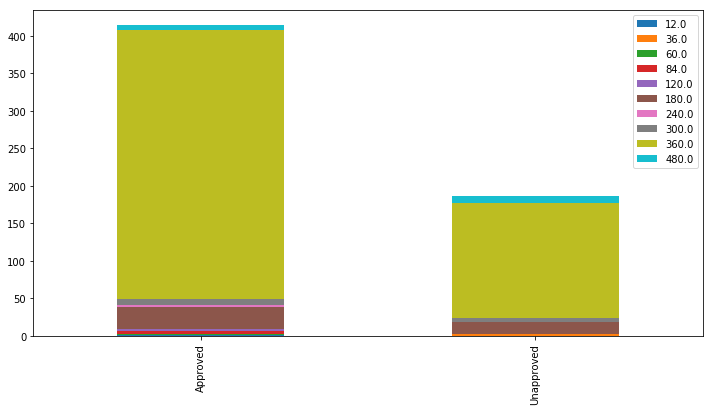

In [63]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(12,6))

In [88]:
#mapping and using dumies for user defined variables

In [64]:
def process_loan_term():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [65]:
def process_credit_history():
    global combined
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
    combined.drop('Credit_History', axis=1, inplace=True)

In [66]:
def process_property():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop('Property_Area', axis=1, inplace=True)

In [67]:
process_gender()

In [69]:
process_martial_status()

In [70]:
process_dependents()

In [71]:
process_education()

In [72]:
process_employment()

In [73]:
process_income()

In [75]:
process_loan_amount()

In [77]:
process_loan_term()

In [78]:
process_credit_history()

In [79]:
process_property()

In [87]:
combined[10:20]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
10,1,1,1,0,70.0,0,1,0,3900.0,55.714286,0,0,0,1,0,1,0,0,0,1
11,1,1,1,0,109.0,0,1,0,4340.0,39.816514,0,0,0,1,0,1,0,0,0,1
12,1,1,1,0,200.0,0,1,0,11179.0,55.895000,0,0,0,1,0,1,0,0,0,1
13,1,0,1,0,114.0,0,0,0,4693.0,41.166667,0,0,0,1,0,1,0,1,0,0
14,1,1,1,0,17.0,0,1,0,2385.0,140.294118,0,1,0,0,0,1,0,0,0,1
15,1,0,1,0,125.0,0,0,0,4950.0,39.600000,0,0,0,1,0,1,0,0,0,1
16,1,0,0,0,100.0,1,0,0,3596.0,35.960000,0,0,1,0,0,0,1,0,0,1
17,0,0,1,0,76.0,0,0,0,3510.0,46.184211,0,0,0,1,1,0,0,0,0,1
18,1,1,0,0,133.0,0,0,0,4887.0,36.744361,0,0,0,1,0,1,0,1,0,0
19,1,1,1,0,115.0,0,0,0,6100.0,53.043478,0,0,0,0,0,1,0,0,0,1


In [89]:
#now we normalise

In [82]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [92]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])

In [93]:
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [94]:
combined[100:110]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
100,1,1,0,0,0.179450,0,1,0,0.076787,0.091216,0,0,1,0,0,1,0,0,0,1
101,1,0,1,0,0.205499,0,0,0,0.090588,0.092194,0,0,0,1,0,1,0,0,1,0
102,1,1,1,0,0.169320,0,0,0,0.153448,0.191287,0,0,0,1,0,1,0,0,0,1
103,1,1,1,0,0.169320,0,0,0,0.085384,0.107875,0,0,0,1,0,1,0,0,1,0
104,1,1,1,0,0.218524,0,0,0,0.039317,0.036459,0,0,0,1,0,1,0,0,0,1
105,1,1,1,0,0.131693,1,0,0,0.033183,0.060250,0,0,0,1,0,1,0,0,0,1
106,1,1,1,0,0.312590,0,1,0,0.139533,0.089221,0,0,0,1,0,1,0,0,0,1
107,1,0,0,0,0.160637,0,0,0,0.074047,0.099628,0,0,0,1,0,1,0,1,0,0
108,1,1,1,0,0.299566,0,1,0,0.074889,0.047516,0,0,0,1,1,0,0,0,0,1
109,1,1,0,0,0.123010,0,0,1,0.017384,0.039353,0,0,0,1,0,1,0,0,1,0


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [113]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [114]:
def recover_train_test_target():
    global combined, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [115]:
train, test, targets = recover_train_test_target()

In [116]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [117]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

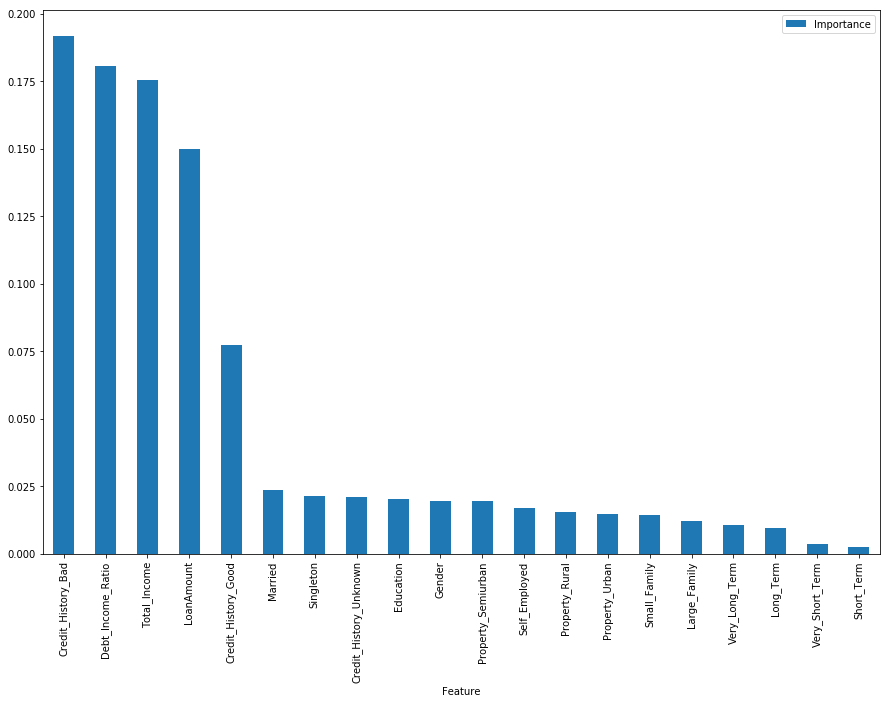

In [118]:
features.plot(kind='bar', figsize=(15, 10))

In [119]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [120]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [121]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
compute_score(model, train, targets, scoring='accuracy')

0.8014013749338973

In [123]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('E:test_loan.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)